In [3]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn import tree, metrics
import matplotlib.pyplot as plt

In [4]:
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

target = df['class']

df = df.drop('class', axis=1)
features = df.columns[0:-1]

In [5]:
ig = {}
for v in features:
    ig[v] = mutual_info_classif(df[v].to_numpy().reshape(-1, 1), target, random_state=1)
sorted_igs = sorted(ig, key=ig.get, reverse=True)

In [6]:
accuracy_test, accuracy_train = [], []
n_features = (5, 10, 40, 100, 250, 700)
for i in n_features:
    aux = sorted_igs[0:i]
    X_train, X_test, y_train, y_test = train_test_split(df[aux], target, test_size = 0.3, random_state=1, stratify=target)

    predictor = tree.DecisionTreeClassifier(random_state=1)
    predictor.fit(X_train, y_train)

    y_pred = predictor.predict(X_train)
    accuracy_train += [round(metrics.accuracy_score(y_train, y_pred), 2)]

    y_pred = predictor.predict(X_test) 
    accuracy_test += [round(metrics.accuracy_score(y_test, y_pred), 2)]

print(accuracy_train)
print(accuracy_test)



[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.78, 0.75, 0.81, 0.81, 0.83, 0.81]


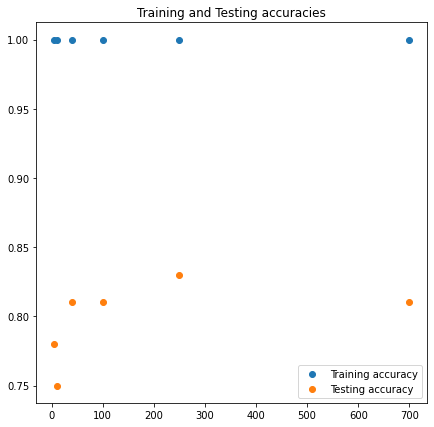

In [7]:
figure = plt.figure(figsize=(7, 7))
plt.title("Training and Testing accuracies")
plt.scatter(n_features, accuracy_train, label='Training accuracy')
plt.scatter(n_features, accuracy_test, label='Testing accuracy')
plt.legend(loc ="lower right")